In [66]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [67]:
dataset = load_digits()
X = dataset.data
Y = dataset.target

Y = np.eye(10)[Y]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [68]:
def sigmoid(X):
    return 1/ (1 + np.exp(-X))
def softmax(X):
    return np.exp(X) / np.sum(np.exp(X))
def root_mean_squared_error(Y_gt, Y_pred):
    return np.sqrt(np.mean((Y_gt - Y_pred) ** 2))

In [69]:
epochs = 100
learning_rate = 0.01
input_layer = X_train.shape[1]
layer_1 = 128
layer_2 = 32
output_layer = Y_train.shape[1]

In [70]:
w1 = np.random.randn(input_layer, layer_1)
w2 = np.random.randn(layer_1, layer_2)
w3 = np.random.randn(layer_2, output_layer)

In [71]:
B1 = np.random.randn(1, layer_1)
B2 = np.random.randn(1, layer_2)
B3 = np.random.randn(1, output_layer)

In [72]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []


for epoch in range (epochs):
    Y_pred_train = []
    Y_pred_test = []
    
    # train
    for x,y in zip(X_train,Y_train):

        x = x.reshape(-1, 1)

        # forward
        out1 = sigmoid(x.T @ w1 + B1)
        out2 = sigmoid(out1 @ w2 + B2)
        out3 = softmax(out2 @ w3 + B3)
        y_pred = out3

        Y_pred_train.append(y_pred)

        loss = root_mean_squared_error(y, y_pred)
      
        # backward

        error = -2 * (y - y_pred)
        grad_B3 = error
        grad_w3 = out2.T @ error 


        error = error @  w3.T *  out2  * (1 - out2)
        grad_B2 = error
        grad_w2 = out1.T @ error  

        error = error @ w2.T * out1 * (1 - out1)
        grad_B1 = error
        grad_w1 = x @ error  

        # update
        w1 -= learning_rate * grad_w1
        B1 -=  learning_rate * grad_B1

        w2 -= learning_rate * grad_w2
        B2 -=  learning_rate * grad_B2

        w3 -= learning_rate * grad_w3
        B3 -=  learning_rate * grad_B3

    # test 
    for x,y in zip(X_test,Y_test):

        x = x.reshape(-1, 1)

        # forward
        out1 = sigmoid(x.T @ w1 + B1)
        out2 = sigmoid(out1 @ w2 + B2)
        out3 = softmax(out2 @ w3 + B3)
        y_pred = out3

        Y_pred_test.append(y_pred)

        loss = root_mean_squared_error(y, y_pred)


    # loss and accuracy train
    Y_pred_train = np.array(Y_pred_train).reshape(-1,10)
    loss_train = root_mean_squared_error(Y_train, Y_pred_train)
    accuracy_train = np.sum(np.argmax(Y_train, axis= 1) ==  np.argmax(Y_pred_train, axis=1)) / len(Y_train)

    print("loss train:",  loss_train)
    print("Accuracy train:", accuracy_train)


    # loss and accuracy test
    Y_pred_test= np.array(Y_pred_test).reshape(-1,10)
    loss_test = root_mean_squared_error(Y_test, Y_pred_test)
    accuracy_test = np.sum(np.argmax(Y_test, axis= 1) ==  np.argmax(Y_pred_test, axis=1)) / len(Y_test)

    print("loss test:",  loss_test)
    print("Accuracy test:", accuracy_test)

    train_losses.append(loss_train)
    test_losses.append(loss_test)
    train_accuracies.append(accuracy_train)
    test_accuracies.append(accuracy_test)








loss train: 0.2639797459907108
Accuracy train: 0.44815588030619347
loss test: 0.21582080376555499
Accuracy test: 0.6888888888888889
loss train: 0.1905537271699564
Accuracy train: 0.7620041753653445
loss test: 0.1800812345562291
Accuracy test: 0.7944444444444444
loss train: 0.1571575794591994
Accuracy train: 0.8399443284620738
loss test: 0.1529046903564794
Accuracy test: 0.8472222222222222
loss train: 0.1338068787897114
Accuracy train: 0.8942240779401531
loss test: 0.1373967830048946
Accuracy test: 0.8861111111111111
loss train: 0.12365996550473318
Accuracy train: 0.9018789144050104
loss test: 0.12430570571498077
Accuracy test: 0.9055555555555556
loss train: 0.11386219278072539
Accuracy train: 0.9116214335421016
loss test: 0.11626679718025114
Accuracy test: 0.9111111111111111
loss train: 0.10462919411002855
Accuracy train: 0.9290187891440501
loss test: 0.11430537739864255
Accuracy test: 0.925
loss train: 0.09438264308034852
Accuracy train: 0.9478079331941545
loss test: 0.113029834317174

In [73]:
import cv2

image = cv2.imread('6.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.reshape(64,1)
x = image

# Forward
out1 = sigmoid(x.T @ w1 + B1)
out2 = sigmoid(out1 @ w2 + B2)
out3 = softmax(out2 @ w3 + B3)
y_pred = out3
print(y_pred)
print(np.argmax(y_pred))

[[6.82422249e-04 3.29078841e-05 6.77890440e-06 6.60102278e-07
  1.17855626e-03 2.51998208e-04 9.97624486e-01 2.50456491e-08
  2.09146106e-04 1.30194355e-05]]
6


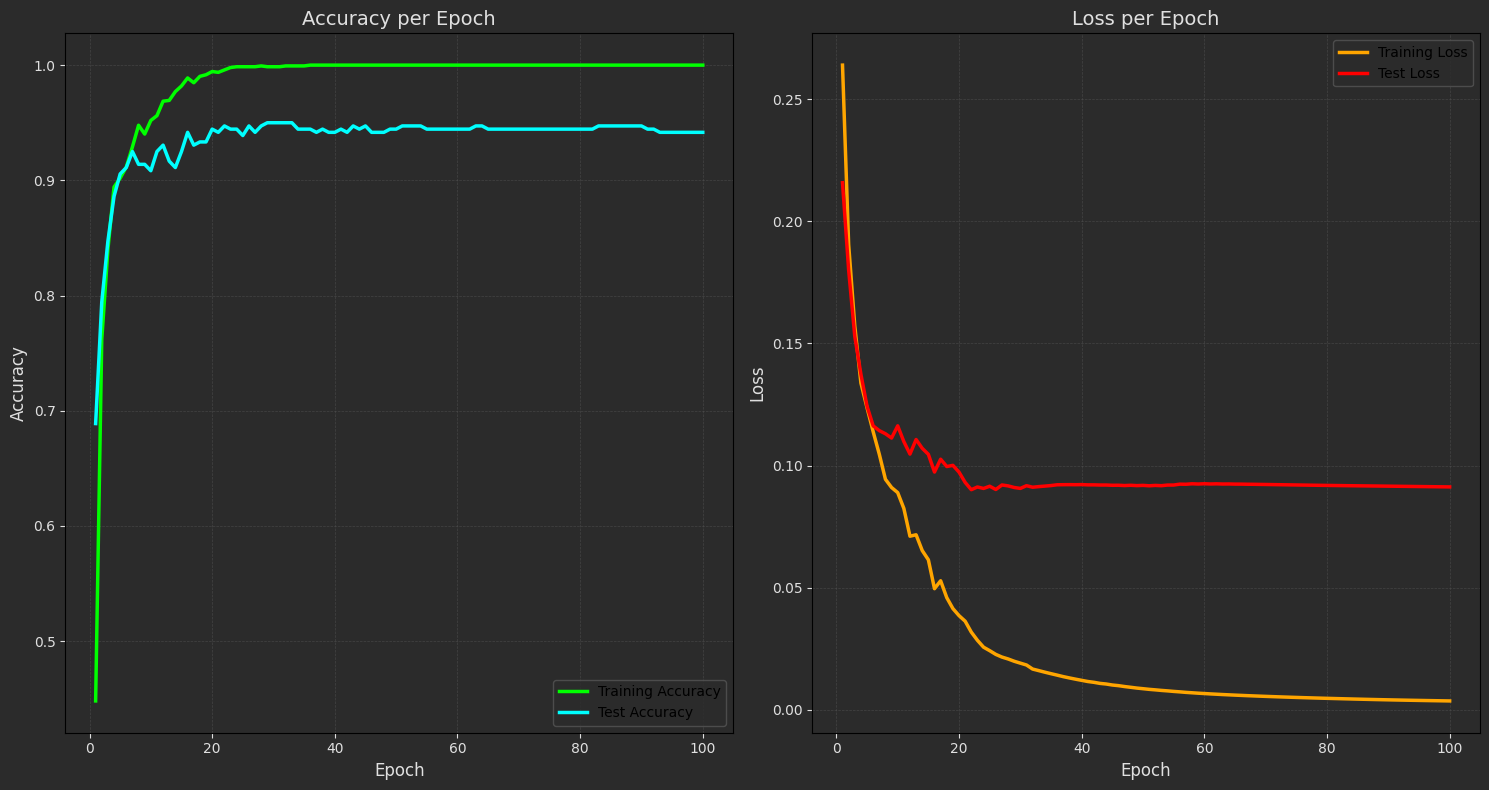

In [74]:
# Plot Loss and Accuracy
epochs_range = range(1, epochs + 1)

fig = plt.figure(figsize=(15, 8))
fig.patch.set_facecolor('#2b2b2b')  # Set dark background

# Accuracy plot
ax1 = fig.add_subplot(121)
ax1.plot(epochs_range, train_accuracies, label="Training Accuracy", color="lime", linewidth=2.5)
ax1.plot(epochs_range, test_accuracies, label="Test Accuracy", color="cyan", linewidth=2.5)
ax1.set_title("Accuracy per Epoch", fontsize=14, color="#e0e0e0")
ax1.set_xlabel("Epoch", fontsize=12, color="#e0e0e0")
ax1.set_ylabel("Accuracy", fontsize=12, color="#e0e0e0")
ax1.legend(loc="best", fontsize=10, facecolor="#2b2b2b", edgecolor="#555555")
ax1.tick_params(axis="x", colors="#e0e0e0")
ax1.tick_params(axis="y", colors="#e0e0e0")
ax1.grid(color="#555555", linestyle="--", linewidth=0.5, alpha=0.6)
ax1.set_facecolor("#2b2b2b")

# Loss plot
ax2 = fig.add_subplot(122)
ax2.plot(epochs_range, train_losses, label="Training Loss", color="orange", linewidth=2.5)
ax2.plot(epochs_range, test_losses, label="Test Loss", color="red", linewidth=2.5)
ax2.set_title("Loss per Epoch", fontsize=14, color="#e0e0e0")
ax2.set_xlabel("Epoch", fontsize=12, color="#e0e0e0")
ax2.set_ylabel("Loss", fontsize=12, color="#e0e0e0")
ax2.legend(loc="best", fontsize=10, facecolor="#2b2b2b", edgecolor="#555555")
ax2.tick_params(axis="x", colors="#e0e0e0")
ax2.tick_params(axis="y", colors="#e0e0e0")
ax2.grid(color="#555555", linestyle="--", linewidth=0.5, alpha=0.6)
ax2.set_facecolor("#2b2b2b")

plt.tight_layout()
plt.show()